In [1]:
%matplotlib inline
from chmp.ds import reload

from ipywidgets import interact
import numpy as np

import importlib
reload('hexworld.fov', 'hexworld')
import hexworld
import hexworld.fov

In [2]:
b = hexworld.Int64Buffer(21, 10)
b[2, 4] = 2

In [6]:
hexworld.to_buffer()

In [3]:
print(hexworld.show(b))

 ___     ___     ___     ___     ___     ___     ___     ___     ___     ___     ___     
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___ 
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 2 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 

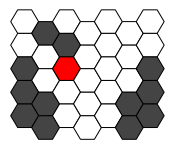

In [4]:
hexworld.plot(hexworld.fov.occlusion_maps[2, 2], colors={
    0: '#ffffff', 
    1: '#444444',
    2: '#ff0000',
})